# Lane Detection Demonstration

In this notebook file, this will cover how to run the Lane Detection pipeline as well as generate the results for the README that accompanies this project.

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (16,12)

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
try: # Make output directory for images for report
    os.makedirs('./images_for_report')
except:
    pass

In [6]:
# Import the Lane Detection and Camera Calibration classes
from lane_lines_pipeline import LaneDetection, CameraCalibration, UdacityUtils

## Camera Calibration Demonstration

Here we will demonstrate how to use the Camera Calibration pipeline and show an example of properly undoing the lens distortion

In [7]:
obj = CameraCalibration(path_to_images='./camera_cal')
obj.perform_calibration()
print(obj)

Intrinsic Matrix:
[[1.15777930e+03 0.00000000e+00 6.67111054e+02]
 [0.00000000e+00 1.15282291e+03 3.86128938e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Coefficients: [[-0.24688775 -0.02373132 -0.00109842  0.00035108 -0.00258571]]
Images successful in finding checkerboard corners: 17/20


In [8]:
# Undistort the image
img = cv2.imread('./camera_cal/calibration1.jpg')
out = obj.undistort_image(img)

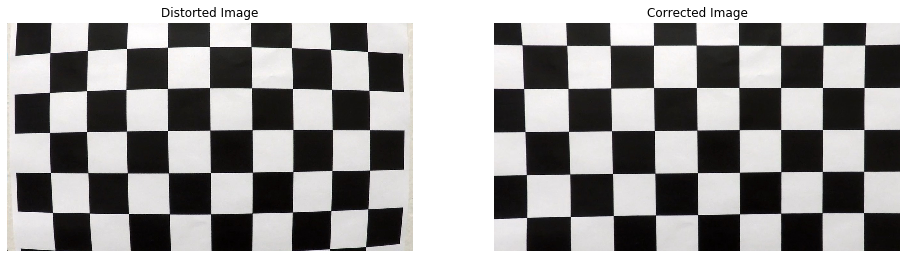

In [9]:
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img[...,::-1])
plt.axis('off')
plt.title('Distorted Image')
plt.subplot(1, 2, 2)
plt.imshow(out[...,::-1])
plt.axis('off')
_ = plt.title('Corrected Image')

In [10]:
fig.savefig('./images_for_report/calibration_demo.png')

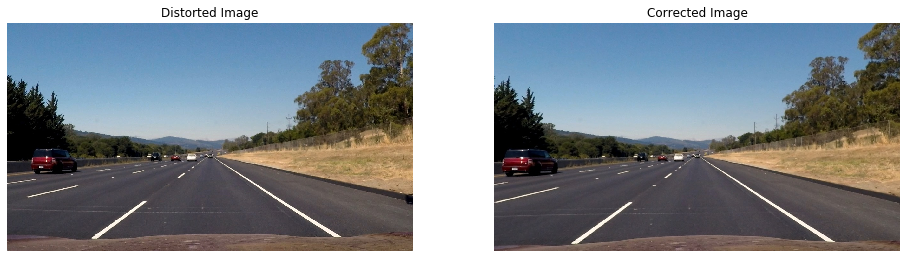

In [11]:
# Try with one of the road
img = cv2.imread('./test_images/straight_lines2.jpg')
out = obj.undistort_image(img)

fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img[...,::-1])
plt.axis('off')
plt.title('Distorted Image')
plt.subplot(1, 2, 2)
plt.imshow(out[...,::-1])
plt.axis('off')
plt.title('Corrected Image')
fig.savefig('./images_for_report/calibration_demo_road.png')

## Lane Detection Demonstration for a Single Image

In this part, we will choose one image and generate all of the debug images to save for the report.

In [12]:
# Create Lane Detection object
vertices = [[-100, 720], [564, 450], [716, 450], [1380, 720]]
lane_detection = LaneDetection(camera_calibration_dir='./camera_cal', vertices=vertices, debug=True)

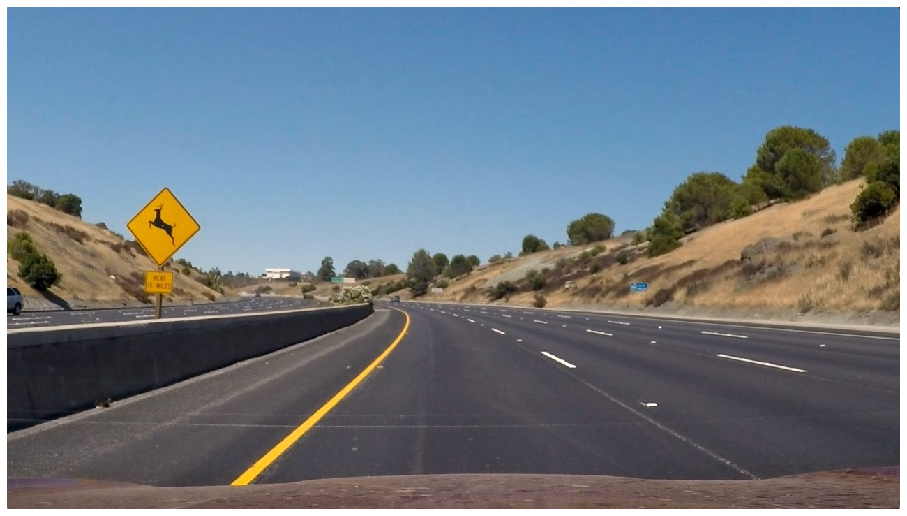

In [13]:
# Read in test image and show what it looks like
# Also apply pipeline to it
img = cv2.imread('./test_images/test2.jpg')
output, results = lane_detection.apply_pipeline(img)
plt.figure()
plt.imshow(img[...,::-1])
_ = plt.axis('off')

True

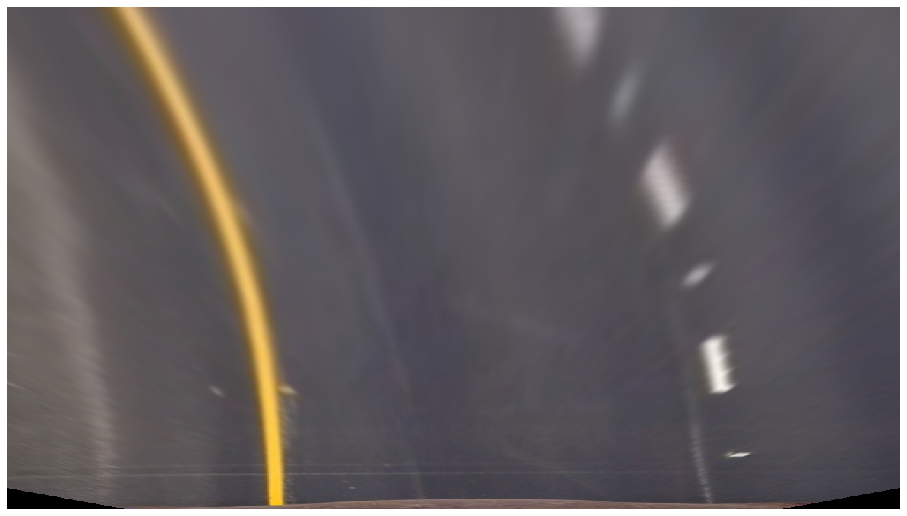

In [15]:
# Get BEV of the road
plt.figure()
plt.imshow(results['bev'][...,::-1])
_ = plt.axis('off')
cv2.imwrite('./images_for_report/test2_bev.png', output_bev)

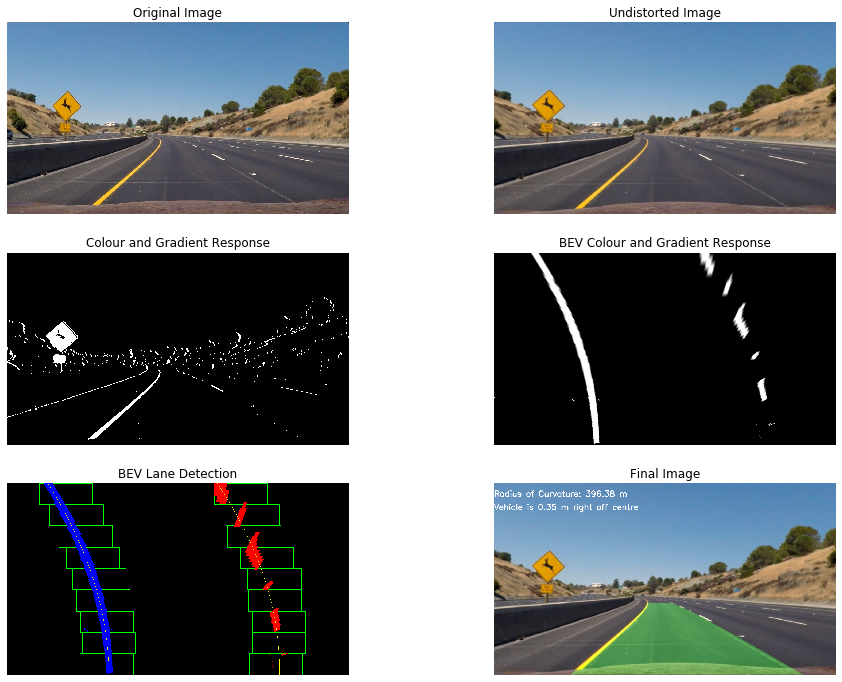

In [16]:
## Showing overall figure to demonstrate pipeline
fig = plt.figure()
plt.subplot(3, 2, 1)
plt.imshow(img[...,::-1])
plt.axis('off')
plt.title('Original Image')
plt.subplot(3, 2, 2)
plt.imshow(results['undist'][...,::-1])
plt.axis('off')
plt.title('Undistorted Image')
plt.subplot(3, 2, 3)
plt.imshow(results['edges'], cmap='gray')
plt.title('Colour and Gradient Response')
plt.axis('off')
plt.subplot(3, 2, 4)
plt.imshow(results['bev_edges'], cmap='gray')
plt.title('BEV Colour and Gradient Response')
plt.axis('off')
plt.subplot(3, 2, 5)
plt.imshow(results['lane_image'][...,::-1])
plt.title('BEV Lane Detection')
plt.axis('off')
plt.subplot(3, 2, 6)
plt.imshow(output[...,::-1])
plt.title('Final Image')
_ = plt.axis('off')
fig.savefig('./images_for_report/pipeline.png')

## Lane Detection Demonstration for the Project Video

Here we will generate the lane detection results using the provided project video

In [17]:
lane_detection = LaneDetection(camera_calibration_dir='./camera_cal', vertices=vertices,
                               smoothing_window_size=20, debug=False)
try:
    os.makedirs('test_videos_output')
except:
    pass

def process_image(image):
    return lane_detection.apply_pipeline(image)

In [18]:
clip1 = VideoFileClip("project_video.mp4")
output = 'test_videos_output/project_video_output.mp4'
lane_clip = clip1.fl_image(process_image)
%time lane_clip.write_videofile(output, audio=False)

t:   0%|          | 2/1260 [00:00<01:16, 16.54it/s, now=None]

Moviepy - Building video test_videos_output/project_video_output.mp4.
Moviepy - Writing video test_videos_output/project_video_output.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/project_video_output.mp4
CPU times: user 2min 33s, sys: 23.7 s, total: 2min 56s
Wall time: 2min 3s


In [19]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))